`import library`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

`connect GoogleDrive`

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


`read data`

In [3]:
data= pd.read_csv('/content/drive/MyDrive/project/PORTODATA/gojekdataset/gofood_dataset.csv')
data.head()

,merchant_name,merchant_area,category,display,product,price,discount_price,isDiscount,description
0,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Almara Kopi (kopi Susu Gula Aren),20000.0,NaN,0,Sajian Kopi Susu Gula Aren Yang Berbeda Dari K...
1,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Ice Almara Kopi (kopi Susu Gula Aren),22000.0,NaN,0,Sajian Kopi Susu Gula Aren Yang Berbeda Dari K...
2,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Millsis,20000.0,NaN,0,Sajian Susu Coklat Milo Dengan Racikan Khas 3 ...
3,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Ice Millsis,20000.0,NaN,0,Sajian Susu Coklat Milo Dengan Racikan Khas 3 ...
4,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Millbro,22000.0,NaN,0,Sajian Susu Coklat Milo Plus Espresso Dengan R...


`check unique / value variabel`

In [4]:
for i in data.columns:
  print('Value Variabel {} adalah {}'.format(i,data[i].unique()))
  print('Jumlah Value Variabel {} adalah {} \n'.format(i,data[i].nunique()))

Value Variabel merchant_name adalah ['330 Kopi, Ciledug' 'Abe Steak, Cibubur' 'Abuba Steak, Cikarang'
 'Aneka Gorengan Siaga' 'Arangsimpur' 'Ayam Trolok' 'BABAKARAN BUNDA DAFA'
 'Bakerman, SCBD' 'Bakmi Kun' 'Bakmi Lopui 93' 'Bakso Titoti, Parung'
 'Banzai!, Bogor Utara' 'Sosis Bakar By Basis.Kuy, Intercon'
 'Bebek Boedjang, BSD' 'Boonsikdang, Hublife Jakarta'
 'Bunga Bakery, Cibinong' 'Bunga Bakery, Depok' 'Burger Bros, Bintaro'
 'Burger Bros, Ciledug' 'Burger Naura' 'C7HomeCoffee' 'Cafe OTSS'
 'Cake Pandeglang Cake' 'Chateraise, Senayan City' 'CIATER BEACH'
 'Cimory Condet, Balekambang' 'Cinepolis, Pondok Kelapa' 'Coffee First'
 'Corndog Doona, Pinang' 'Corndog Mozarella' 'Cotta Coffee, Jatiwaringin'
 'Crackling' 'Dapur Aliqa, Gembong' 'Dapur Cokelat, Cibubur'
 'Dapur Cokelat, Ciputat' 'Dapur Cokelat, Ciracas' 'Dapur Cokelat, Depok'
 'Dear Butter, Pakubuwono' 'Dough Lab, Senopati' 'DuriAnd, Bogor'
 'Emados Shawarma, Condet' 'Emados Shawarma, Depok' 'Faasos, Bintaro'
 'Faasos, Blok M' 

`check tipe data dan missing value`

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45195 entries, 0 to 45194
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   merchant_name   45195 non-null  object 
 1   merchant_area   45195 non-null  object 
 2   category        45195 non-null  object 
 3   display         45195 non-null  object 
 4   product         45195 non-null  object 
 5   price           45195 non-null  float64
 6   discount_price  2738 non-null   float64
 7   isDiscount      45195 non-null  int64  
 8   description     21720 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.1+ MB


`persentase missing value`

In [6]:
(data.isna().sum()*100/len(data)).sort_values(ascending=False)

discount_price    93.941808
description       51.941586
merchant_name      0.000000
merchant_area      0.000000
category           0.000000
display            0.000000
product            0.000000
price              0.000000
isDiscount         0.000000
dtype: float64

In [7]:
data_with_desc_disc = data.copy()

`split variabel, hapus missingvalue`

In [8]:
data[['Brand','Lokasi']] = data['merchant_name'].str.split(',',expand=True,n=2)
data.drop(['merchant_name','discount_price','description'],axis=1,inplace=True)
data.head()

,merchant_area,category,display,product,price,isDiscount,Brand,Lokasi
0,jakarta,Kopi/Minuman/Roti,Signature,Hot Almara Kopi (kopi Susu Gula Aren),20000.0,0,330 Kopi,Ciledug
1,jakarta,Kopi/Minuman/Roti,Signature,Ice Almara Kopi (kopi Susu Gula Aren),22000.0,0,330 Kopi,Ciledug
2,jakarta,Kopi/Minuman/Roti,Signature,Hot Millsis,20000.0,0,330 Kopi,Ciledug
3,jakarta,Kopi/Minuman/Roti,Signature,Ice Millsis,20000.0,0,330 Kopi,Ciledug
4,jakarta,Kopi/Minuman/Roti,Signature,Hot Millbro,22000.0,0,330 Kopi,Ciledug


In [9]:
#membuat lowercase
data = data.apply(lambda x: x.astype(str).str.lower())

#hapus tanda baca
data['Brand'] = data['Brand'].str.replace(r'[^\w\s]+', '')
data['display'] = data['display'].str.replace(r'[^\w\s]+', '')

#hapus whitespace
data = data.apply(lambda x: x.astype(str).str.strip())

data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


,merchant_area,category,display,product,price,isDiscount,Brand,Lokasi
0,jakarta,kopi/minuman/roti,signature,hot almara kopi (kopi susu gula aren),20000.0,0,330 kopi,ciledug
1,jakarta,kopi/minuman/roti,signature,ice almara kopi (kopi susu gula aren),22000.0,0,330 kopi,ciledug
2,jakarta,kopi/minuman/roti,signature,hot millsis,20000.0,0,330 kopi,ciledug
3,jakarta,kopi/minuman/roti,signature,ice millsis,20000.0,0,330 kopi,ciledug
4,jakarta,kopi/minuman/roti,signature,hot millbro,22000.0,0,330 kopi,ciledug


**EDA**

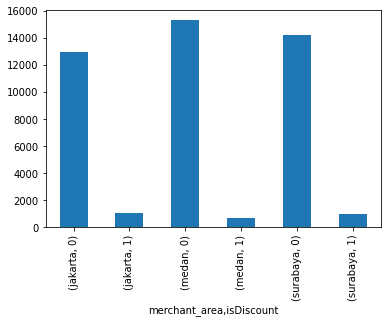

In [14]:
data.groupby('merchant_area')['isDiscount'].value_counts().plot(kind='bar')

In [11]:
data.groupby(['merchant_area','Lokasi']).count()['Brand'].reset_index()

,merchant_area,Lokasi,Brand
0,jakarta,akses ui,175
1,jakarta,ampera,45
2,jakarta,aren jaya,48
3,jakarta,balekambang,92
4,jakarta,bangbarung,25
...,...,...,...
302,surabaya,wiyung,549
303,surabaya,wonoayu,90
304,surabaya,wonokusumo,60
305,surabaya,wonosari,111


In [12]:
data[data['Lokasi'] == 'none'].index.to_numpy()

array([  217,   218,   219, ..., 44711, 44712, 44713])

In [13]:
data['display'].value_counts().head(30)

minuman                2064
makanan                1275
roti                    894
snack                   802
coffee                  696
bolu                    425
non coffee              386
beverages               381
drink                   341
snacks                  321
rtd                     320
alacarte                267
cake                    262
dessert                 260
oden                    253
menu                    246
fried                   245
paket hemat             237
tea                     227
beverage                225
aneka minuman           199
groceries beverages     186
food                    185
combo                   174
recommended             171
ala carte               162
praktis                 157
roti kampoeng roti      155
kue kecil               154
milk tea                153
Name: display, dtype: int64